In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install nnabla nnabla_ext_cuda110 nnabla-converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [3]:
!pip install numpy==1.23.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [4]:
!pip install --upgrade Pillow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 24.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [5]:
!pip install glob2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import nnabla as nn
from nnabla.utils.image_utils import imread
from nnabla.models.semantic_segmentation import DeepLabV3plus
from nnabla.models.semantic_segmentation.utils import ProcessImage

In [6]:
import glob2
file_ls = glob2.glob('/content/drive/MyDrive/adv proj/input/room/*')
print(file_ls)

['/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143913_463.JPG', '/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143942_875.JPG', '/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143917_136.JPG', '/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143910_733.JPG', '/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143902_603.JPG', '/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143941_511.JPG', '/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143930_936.JPG', '/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143946_704.JPG', '/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143928_568.JPG', '/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143948_113.JPG', '/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143914_572.JPG', '/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143906_682.JPG', '/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143857_455.JPG', '/content/drive/MyDrive/adv proj/inpu

In [ ]:
target_h = 800
target_w = 800
from nnabla.ext_utils import get_extension_context
# nn.set_default_context(get_extension_context('cudnn', device_id='0'))
prediction_file = '/content/drive/MyDrive/adv proj/output/room/predictions.txt'

In [ ]:
for img in file_ls:
  image = imread(img)
  print(img)
  x = nn.Variable((1, 3, target_h, target_w), need_grad=False)
  deeplabv3 = DeepLabV3plus('voc-coco',output_stride=8)
  y = deeplabv3(x)

  processed_image = ProcessImage(image, target_h, target_w)
  input_array = processed_image.pre_process()

  x.d = input_array
  y.forward(clear_buffer=True)
  print("done")
  output = np.argmax(y.d, axis=1)

  post_processed = processed_image.post_process(output[0])
  output_path = img.split('/')
  output_path[-3] = 'output'
  output_path = '/'.join(output_path)
  with open(prediction_file, 'a') as f:
    f.write(output_path)
    predicted_classes = np.unique(post_processed).astype(int)
    for i in range(predicted_classes.shape[0]):
        if predicted_classes[i]==20:
          label = 'other'
        else:
          label = str(deeplabv3.category_names[predicted_classes[i]])
        print(label)
        f.write(',')
        f.write(label)
    f.write('\n')
    f.close()
    processed_image.save_segmentation_image(output_path)

/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143913_463.JPG
Loading /root/nnabla_data/nnp_models/semantic_segmentation/DeepLabV3-voc-coco-os-8.nnp.
done
aeroplane
bicycle
cow
dog
other
/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143942_875.JPG
Loading /root/nnabla_data/nnp_models/semantic_segmentation/DeepLabV3-voc-coco-os-8.nnp.
done
aeroplane
bottle
cow
dog
other
/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143917_136.JPG
Loading /root/nnabla_data/nnp_models/semantic_segmentation/DeepLabV3-voc-coco-os-8.nnp.
done
aeroplane
cow
dog
/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143910_733.JPG
Loading /root/nnabla_data/nnp_models/semantic_segmentation/DeepLabV3-voc-coco-os-8.nnp.
done
aeroplane
bottle
cow
dog
other
/content/drive/MyDrive/adv proj/input/room/DJI_20200226_143902_603.JPG
Loading /root/nnabla_data/nnp_models/semantic_segmentation/DeepLabV3-voc-coco-os-8.nnp.
done
aeroplane
cow
dog
other
/content/drive/MyDrive/adv proj/input/room/D

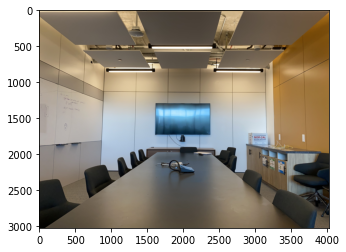

In [ ]:
orig=mpimg.imread('/content/DJI_20200226_143917_136.JPG')
plt.imshow(orig)

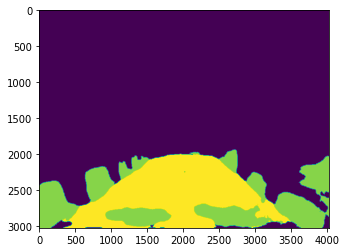

In [ ]:
plt.imshow(post_processed)